# The Sparks Foundation
# Task-01 Prediction using Supervised ML

# VAIBHAVI BANDI

# **Linear Regression with Python Scikit Learn**
In this section we will see how the Python Scikit-Learn library for machine learning can be used to implement regression functions. We will start with simple linear regression involving two variables.

### **Simple Linear Regression**
In this regression task we will predict the percentage of marks that a student is expected to score based upon the number of hours they studied. This is a simple linear regression task as it involves just two variables.

In [48]:
import pandas as pd
import numpy as np  
import seaborn as sns
import matplotlib.pyplot as plt  
%matplotlib inline

In [49]:
#Now import the data
url="http://bit.ly/w-data"
data=pd.read_csv(url)
print("Data imported successfully")
data

Data imported successfully


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [50]:
data.shape

(25, 2)

In [51]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
Hours     25 non-null float64
Scores    25 non-null int64
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [52]:
data.columns

Index(['Hours', 'Scores'], dtype='object')

In [53]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [54]:
data.groupby(['Hours'])['Scores'].mean()

Hours
1.1    17.0
1.5    20.0
1.9    24.0
2.5    25.5
2.7    27.5
3.2    27.0
3.3    42.0
3.5    30.0
3.8    35.0
4.5    41.0
4.8    54.0
5.1    47.0
5.5    60.0
5.9    62.0
6.1    67.0
6.9    76.0
7.4    69.0
7.7    85.0
7.8    86.0
8.3    81.0
8.5    75.0
8.9    95.0
9.2    88.0
Name: Scores, dtype: float64

# Data visualization
Let's plot our data points on 2-D graph to eyeball our dataset and see if we can manually find any relationship between the data. We can create the plot with the following script:

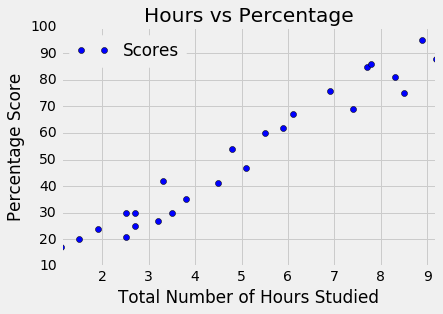

In [55]:
# Plotting the distribution of scores
plt.style.use('fivethirtyeight')
data.plot(x='Hours', y='Scores', c="blue",style='o')  
plt.title('Hours vs Percentage')  
plt.xlabel('Total Number of Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001481E899108>,
      dtype=object)

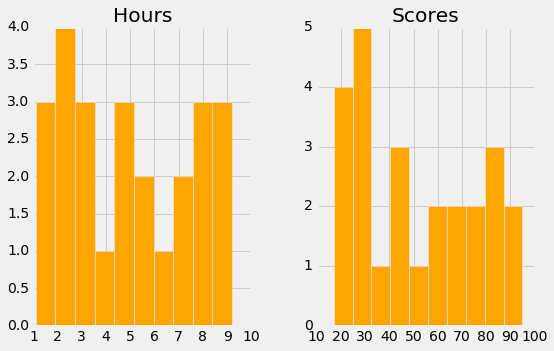

In [56]:
data.hist(figsize=(8,5),color='orange')

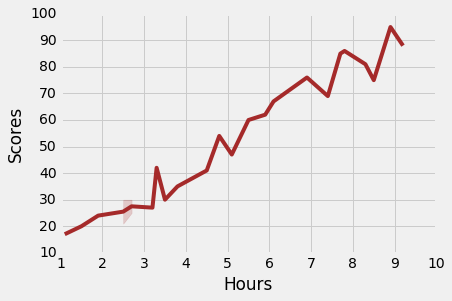

In [57]:
sns.lineplot(data.Hours,data.Scores,color="brown") 

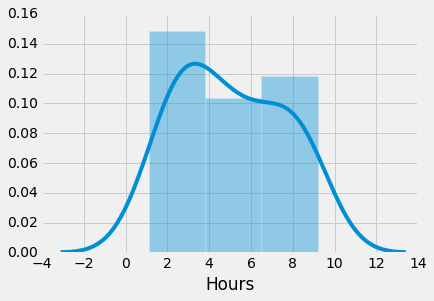

In [58]:
sns.distplot(data.Hours)


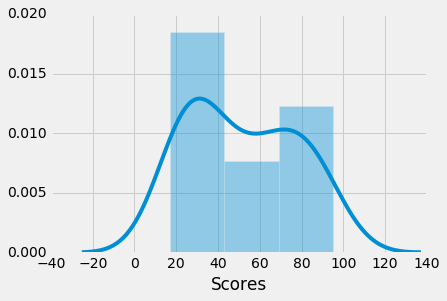

In [59]:
sns.distplot(data.Scores)

In [60]:
data.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


**From the graph above, we can clearly see that there is a positive linear relation between the number of hours studied and percentage of score.**

# Linear Regression Model
### **Preparing the data**

The next step is to divide the data into "attributes" (inputs) and "labels" (outputs).

In [61]:
#Splitting training and test set data
from sklearn.model_selection import train_test_split

X = data.iloc[:,:-1].values
Y = data.iloc[:,1].values
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,train_size=0.8,test_size=0.2,random_state=0)

print("data alloction succesfull")

data alloction succesfull


In [62]:
print("Shape of X : ",X.shape)
print("Shape of Y : ",Y.shape)
print("Shape of X_test : ",X_test.shape)
print("Shape of Y_test  : ",Y_test.shape)

Shape of X :  (25, 1)
Shape of Y :  (25,)
Shape of X_test :  (5, 1)
Shape of Y_test  :  (5,)


Now that we have our attributes and labels, the next step is to split this data into training and test sets. We'll do this by using Scikit-Learn's built-in train_test_split() method:

### **Training the Algorithm**
We have split our data into training and testing sets, and now is finally the time to train our algorithm. 

In [63]:
from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()  
regressor.fit(X_train, Y_train) 

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [64]:
m= regressor.coef_
c = regressor.intercept_
print('Slope:',m)
print('Intercept:',c)

Slope: [9.91065648]
Intercept: 2.018160041434683


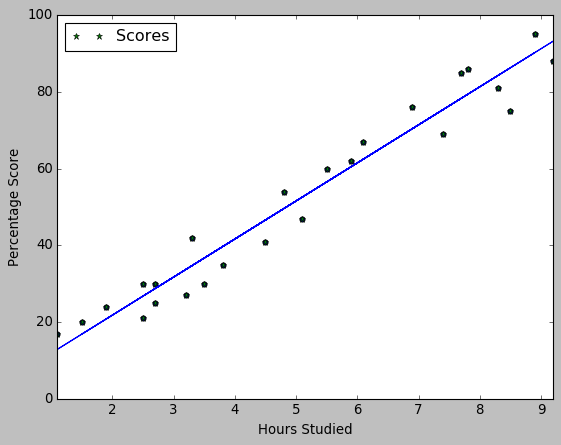

In [65]:
 # Plotting the regression line
line =(regressor.coef_*X)+regressor.intercept_
# Plotting for the test data
plt.style.use('classic')
data.plot(x='Hours', y='Scores', c="g",style='*') 
plt.scatter(X, Y)
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score') 
plt.plot(X, line);
plt.show()

### **Making Predictions**
Now that we have trained our algorithm, it's time to make some predictions.

In [66]:
print(X_test) # Testing data - In Hours
Y_pred = regressor.predict(X_test) # Predicting the scores

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [67]:
# Comparing Actual vs Predicted
df = pd.DataFrame({'Actual': Y_test, 'Predicted': Y_pred})  
df 

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


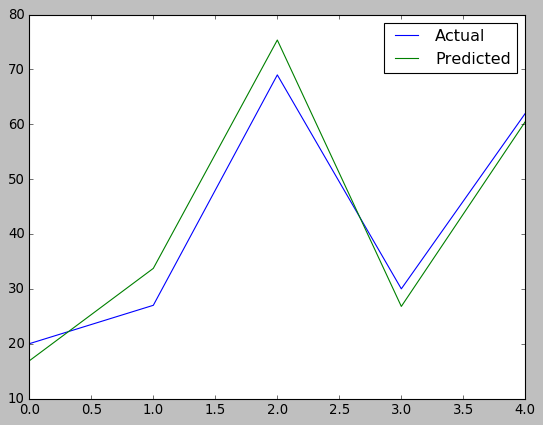

In [68]:
df.Actual.plot()
df.Predicted.plot()
plt.legend()

In [157]:
print("Training score : ",regressor.score(X_train,Y_train))
print("Test set score : " ,regressor.score(X_test,Y_test))

Training score :  0.9515510725211553
Test set score :  0.9454906892105356


# **Evaluating the model**
<strong> MAE = True values – Predicted values </strong><br>
    MAE takes the <strong>average</strong> of this error from every sample in a dataset and gives the output.

In [154]:
from sklearn import metrics  
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(Y_test, Y_pred)) 

Mean Absolute Error: 4.183859899002975


<strong>R-Squared (Coefficient of Determination) Regression Score.

In [160]:
print("R2-score: %.2f" % metrics.r2_score(Y_pred,Y_test) )
r2 = metrics.r2_score(Y_pred,Y_test)

R2-score: 0.95


# Results
Predicting marks of student who studies for 9.25hrs a day.

In [146]:
Hours = np.array([[9.25]])
predict=regressor.predict(Hours)
print("No of Hours = {}".format(Hours))
print("Predicted Score = {}".format(predict[0]))

No of Hours = [[9.25]]
Predicted Score = 93.69173248737538


In [156]:
X_input=float(input("Enter number of hours for predicting percentage marks of student : "))
print('Predicted Score{}'.format(regressor.predict([[X_input]])))

Enter number of hours for predicting percentage marks of student : 10
Predicted Score[101.12472485]


Here if we predict the marks of a student who studied for more than around 10hrs a day the predicted score crosses 100 since this is linear regression and our predicted values are in a straight line that never ends.

<strong>With this Simple Linear Regression Model we got an accuracy of 94.55%, which is pretty good.